In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
from pandas_datareader import wb
style.available
import seaborn as sns
%matplotlib inline
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [5]:
global_confirmed_cases = pd.read_csv('./time_series_covid19_confirmed_global.csv')
global_confirmed_cases = global_confirmed_cases.drop(columns=['Lat', 'Long'])
global_confirmed_cases['Total Confirmed'] = global_confirmed_cases.iloc[:,-1]

# New Section

In [6]:
global_confirmed_cases = global_confirmed_cases.groupby('Country/Region').sum().reset_index()
global_confirmed_cases = global_confirmed_cases.rename(columns={'Country/Region': 'Country'})
global_confirmed_cases.head()

<ipython-input-6-51df54879c6b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_confirmed_cases = global_confirmed_cases.groupby('Country/Region').sum().reset_index()


,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total Confirmed
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,105288


In [7]:
global_death_cases = pd.read_csv('./time_series_covid19_deaths_global.csv')
global_death_cases = global_death_cases.drop(columns=['Lat', 'Long'])
global_death_cases['Total Deaths'] = global_death_cases.iloc[:,-1]

In [8]:
global_death_cases = global_death_cases.groupby('Country/Region').sum().reset_index()
global_death_cases = global_death_cases.rename(columns={'Country/Region': 'Country'})
global_death_cases.head()

<ipython-input-8-4aecef63b8e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_death_cases = global_death_cases.groupby('Country/Region').sum().reset_index()


,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total Deaths
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,Albania,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,Angola,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [9]:
global_confirmed_cases.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Total Confirmed
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,209451
1,Albania,0,0,0,0,0,0,0,0,0,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,334457
2,Algeria,0,0,0,0,0,0,0,0,0,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,271496
3,Andorra,0,0,0,0,0,0,0,0,0,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,47890
4,Angola,0,0,0,0,0,0,0,0,0,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,105288


In [10]:
cleaned_global_confirmed = global_confirmed_cases[['Country', 'Total Confirmed']]
cleaned_global_deaths = global_death_cases[['Country', 'Total Deaths']]


global_summary = cleaned_global_confirmed.merge(cleaned_global_deaths, on=['Country'], how='left')

global_recovered = cleaned_global_confirmed.merge(cleaned_global_deaths, on=['Country'], how='left')

global_summary['Total Recovered'] = global_summary['Total Confirmed'] - global_summary['Total Deaths']

global_summary['Mortality Rate (%)'] = (global_summary['Total Deaths'] / global_summary['Total Confirmed']*100).round(2)
# latest_global_stats.to_csv('latest_global_stats.csv')
global_summary.head()

,Country,Total Confirmed,Total Deaths,Total Recovered,Mortality Rate (%)
0,Afghanistan,209451,7896,201555,3.77
1,Albania,334457,3598,330859,1.08
2,Algeria,271496,6881,264615,2.53
3,Andorra,47890,165,47725,0.34
4,Angola,105288,1933,103355,1.84


In [11]:
worldwide_stats = global_summary[['Total Confirmed', 'Total Deaths', 'Total Recovered']].sum()
worldwide_stats = worldwide_stats.to_frame().rename(columns={0: 'Number of Cases'})
worldwide_stats

,Number of Cases
Total Confirmed,676570149
Total Deaths,6881802
Total Recovered,669688347


In [12]:
total_confirmed = worldwide_stats.iloc[0,0]
total_deaths = worldwide_stats.iloc[1,0]
total_recovered = worldwide_stats.iloc[2,0]


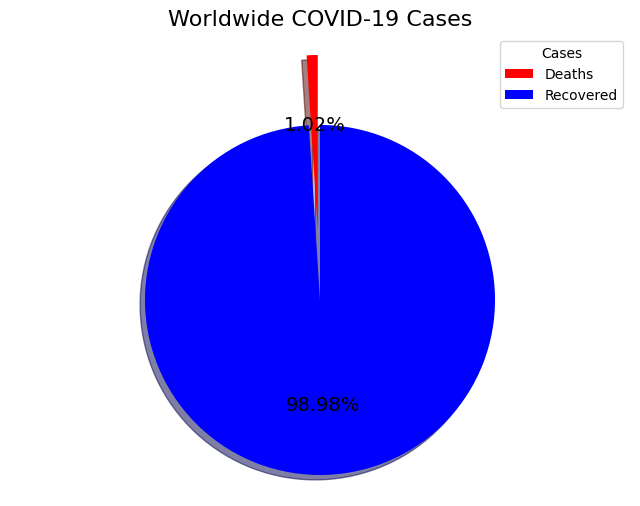

In [13]:
labels = ['Deaths', 'Recovered']
colors = ['red', 'blue']
values = [total_deaths, total_recovered]
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(values, explode=(0.4, 0), autopct='%1.2f%%', shadow=True, startangle=90, textprops={'fontsize': 14}, colors=colors)
ax.axis('equal')
ax.set_title('Worldwide COVID-19 Cases', size=16)
ax.legend(labels, title='Cases', loc='upper right')
plt.show()

In [14]:
total_global_cases = global_confirmed_cases.sum(axis=0).to_frame()
total_global_cases = total_global_cases.iloc[2:-1].rename(columns={0: 'Total Confirmed Cases'})

In [15]:
total_global_cases.index = pd.to_datetime(total_global_cases.index, format='%m/%d/%y')

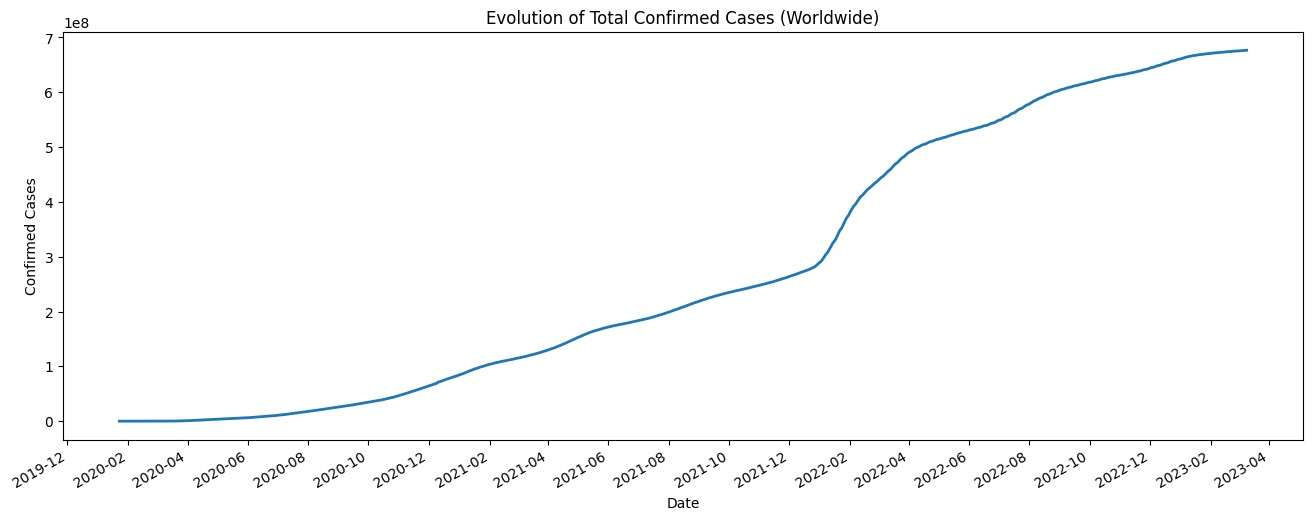

In [16]:

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(total_global_cases.index, total_global_cases['Total Confirmed Cases'], linewidth=2)

ax.set_title('Evolution of Total Confirmed Cases (Worldwide)')
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed Cases')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

plt.show()

In [17]:
total_global_deaths = global_death_cases.sum(axis=0).to_frame()
total_global_deaths = total_global_deaths.iloc[2:-1].rename(columns={0: 'Total Deaths'})

In [18]:
total_global_deaths.index = pd.to_datetime(total_global_deaths.index, format='%m/%d/%y')

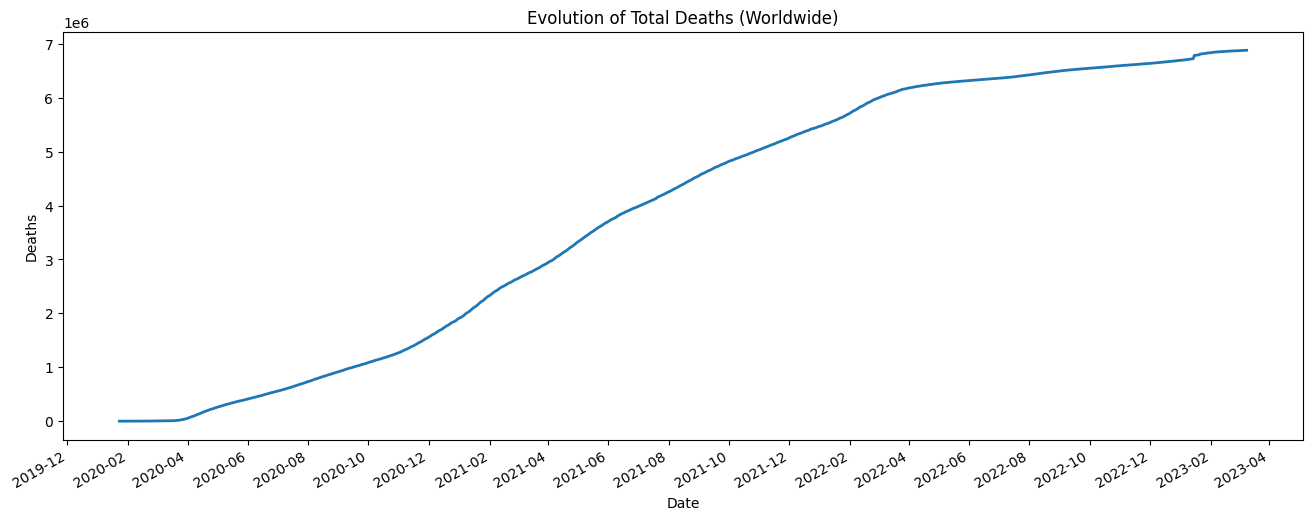

In [19]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(total_global_deaths.index, total_global_deaths['Total Deaths'], linewidth=2)

ax.set_title('Evolution of Total Deaths (Worldwide)')
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.autofmt_xdate()

plt.show()

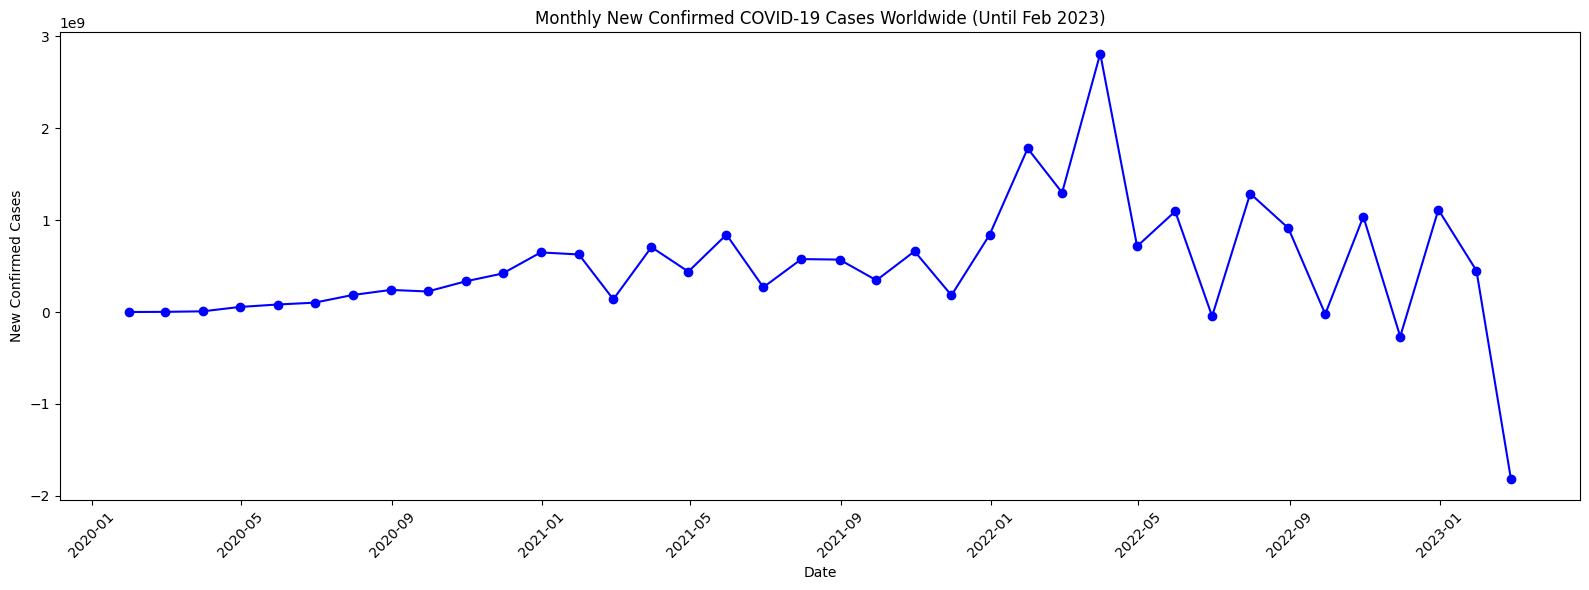

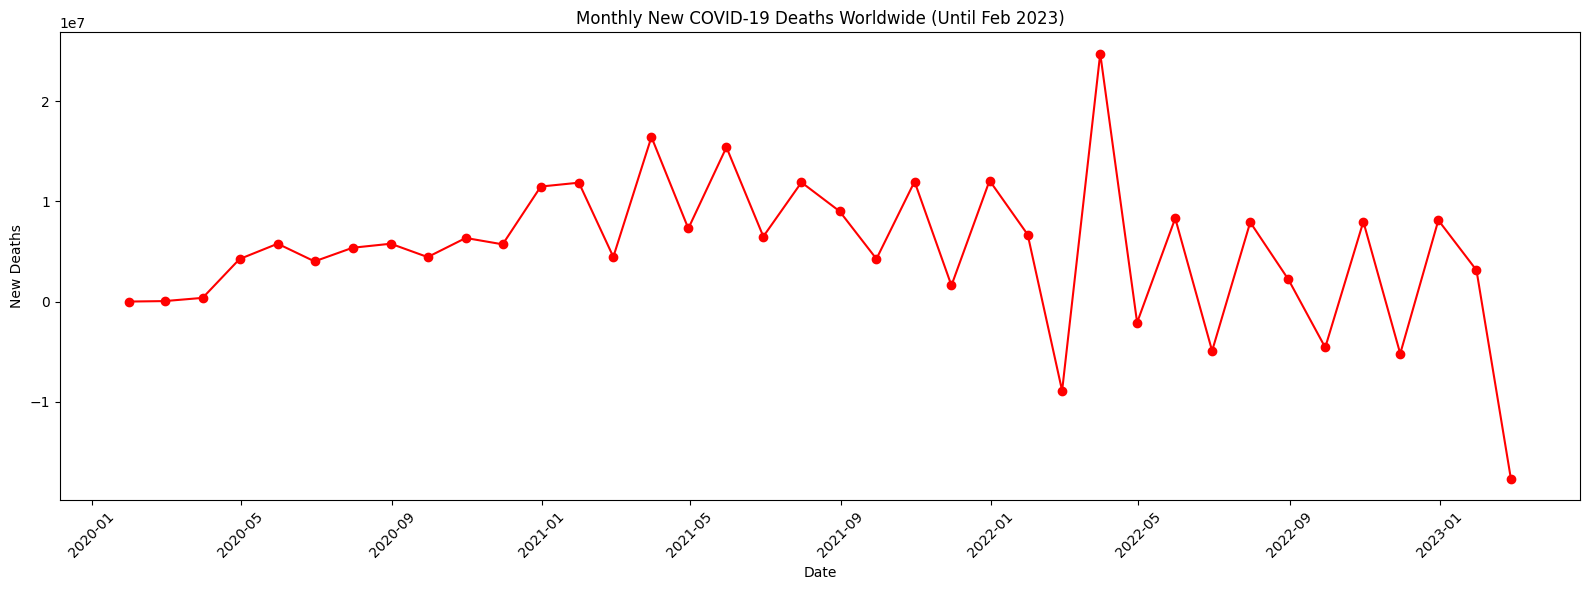

In [20]:

# Filter the DataFrame to include data only up to March 2023
total_global_cases_until_march2023 = total_global_cases[total_global_cases.index <= '2023-02-28']
total_global_deaths_until_march2023 = total_global_deaths[total_global_deaths.index <= '2023-02-28']

# Resample to get the sum at the end of each month and then use diff() to find the monthly difference
monthly_new_cases = total_global_cases_until_march2023.resample('M').sum().diff().fillna(0)
monthly_new_deaths = total_global_deaths_until_march2023.resample('M').sum().diff().fillna(0)

# Plotting the new monthly confirmed cases
plt.figure(figsize=(16,6))
plt.plot(monthly_new_cases.index, monthly_new_cases['Total Confirmed Cases'], marker='o', linestyle='-', color='b')
plt.title('Monthly New Confirmed COVID-19 Cases Worldwide (Until Feb 2023)')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the new monthly death cases
plt.figure(figsize=(16,6))
plt.plot(monthly_new_deaths.index, monthly_new_deaths['Total Deaths'], marker='o', linestyle='-', color='r')
plt.title('Monthly New COVID-19 Deaths Worldwide (Until Feb 2023)')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Map for confirmed cases
fig_confirmed = px.choropleth(global_summary,
                              locations="Country",
                              locationmode='country names',
                              color="Total Confirmed",
                              hover_name="Country",
                              color_continuous_scale=px.colors.sequential.OrRd,
                              title="Global Confirmed COVID-19 Cases")

# Map for deaths
fig_deaths = px.choropleth(global_summary,
                           locations="Country",
                           locationmode='country names',
                           color="Total Deaths",
                           hover_name="Country",
                           color_continuous_scale=px.colors.sequential.OrRd,
                           title="Global COVID-19 Deaths")

fig_confirmed.show()
fig_deaths.show()


In [22]:
print(total_global_cases.columns)


Index(['Total Confirmed Cases'], dtype='object')


In [23]:

# Fetch population data
pop_data = wb.download(indicator='SP.POP.TOTL', country='all', start=2021, end=2021)
pop_data = pop_data.reset_index()

global_summary = global_summary.merge(pop_data[['country', 'SP.POP.TOTL']], left_on='Country', right_on='country', how='left')

# Calculate the number of cases per 100,000 people
global_summary['Cases per 100,000 People'] = global_summary['Total Confirmed'] / global_summary['SP.POP.TOTL'] * 100000
# Calculate the number of deaths per 100,000 people
global_summary['Deaths per 100,000 People'] = global_summary['Total Deaths'] / global_summary['SP.POP.TOTL'] * 100000



In [24]:
global_summary = global_summary.rename(columns={'SP.POP.TOTL': 'Population'})

In [25]:
global_summary = global_summary.drop(columns=['country'])
global_summary.head()


,Country,Total Confirmed,Total Deaths,Total Recovered,Mortality Rate (%),Population,"Cases per 100,000 People","Deaths per 100,000 People"
0,Afghanistan,209451,7896,201555,3.77,40099462.0,522.328704,19.691037
1,Albania,334457,3598,330859,1.08,2811666.0,11895.331807,127.966835
2,Algeria,271496,6881,264615,2.53,44177969.0,614.550660,15.575637
3,Andorra,47890,165,47725,0.34,79034.0,60594.174659,208.770909
4,Angola,105288,1933,103355,1.84,34503774.0,305.149228,5.602286


In [26]:
fig_confirmed = px.choropleth(global_summary,
                              locations="Country",
                              locationmode='country names',
                              color="Cases per 100,000 People",
                              hover_name="Country",
                              color_continuous_scale=px.colors.sequential.OrRd,
                              title="Global Confirmed COVID-19 Cases")

# Map for deaths
fig_deaths = px.choropleth(global_summary,
                           locations="Country",
                           locationmode='country names',
                           color="Deaths per 100,000 People",
                           hover_name="Country",
                           color_continuous_scale=px.colors.sequential.OrRd,
                           title="Global COVID-19 Deaths")

fig_confirmed.show()
fig_deaths.show()

In [27]:

top_cases_per_capita = global_summary.sort_values(by='Cases per 100,000 People', ascending=False).head(10)

top_deaths_per_capita = global_summary.sort_values(by='Deaths per 100,000 People', ascending=False).head(10)


In [28]:


fig_cases = px.bar(top_cases_per_capita, y='Cases per 100,000 People', x='Country', orientation='v',
                   title='Top 10 Countries with Most COVID-19 Cases per 100,000 People',
                   color='Cases per 100,000 People',
                   text='Cases per 100,000 People')

fig_cases.update_layout(
    xaxis_title="Country",
    yaxis_title="Cases per 100,000 People (Log Scale)",
    yaxis_tickformat='.2f',
    showlegend=False
)
fig_cases.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_cases.show()

# Chart for deaths per 100,000 people
fig_deaths = px.bar(top_deaths_per_capita, y='Deaths per 100,000 People', x='Country', orientation='v',
                    title='Top 10 Countries with Most COVID-19 Deaths per 100,000 People',
                    color='Deaths per 100,000 People',
                    text='Deaths per 100,000 People')

fig_deaths.update_layout(
    xaxis_title="Country",
    yaxis_title="Deaths per 100,000 People (Log Scale)",
    yaxis_tickformat='.2f',
    showlegend=False
)
fig_deaths.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_deaths.show()


In [29]:

# Chart for cases per 100,000 people
fig_cases = px.bar(top_cases_per_capita, y='Cases per 100,000 People', x='Country', orientation='v',
                   title='Top 10 Countries with Most COVID-19 Cases per 100,000 People',
                   color='Cases per 100,000 People',
                   log_y=True,
                   text='Cases per 100,000 People')

fig_cases.update_layout(
    xaxis_title="Country",
    yaxis_title="Cases per 100,000 People (Log Scale)",
    yaxis_tickformat='.2f',
    showlegend=False
)
fig_cases.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_cases.show()

# Chart for deaths per 100,000 people
fig_deaths = px.bar(top_deaths_per_capita, y='Deaths per 100,000 People', x='Country', orientation='v',
                    title='Top 10 Countries with Most COVID-19 Deaths per 100,000 People',
                    color='Deaths per 100,000 People',
                    log_y=True,  # Use a log scale for the y-axis
                    text='Deaths per 100,000 People')

fig_deaths.update_layout(
    xaxis_title="Country",
    yaxis_title="Deaths per 100,000 People (Log Scale)",
    yaxis_tickformat='.2f',
    showlegend=False
)
fig_deaths.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_deaths.show()


In [30]:
gdp_per_capita = wb.download(indicator='NY.GDP.PCAP.CD', country='all', start=2021, end=2021)
gdp_per_capita.reset_index(inplace=True)

gni_per_capita = wb.download(indicator='NY.GNP.PCAP.CD', country='all', start=2021, end=2021)

gni_per_capita.reset_index(inplace=True)

gni_per_capita.rename(columns={'country': 'Country', 'NY.GNP.PCAP.CD': 'GNI per Capita'}, inplace=True)

In [31]:
print(gdp_per_capita.columns)

Index(['country', 'year', 'NY.GDP.PCAP.CD'], dtype='object')


In [32]:

print(gdp_per_capita.columns)

gdp_per_capita.rename(columns={'country': 'Country'}, inplace=True)
gni_per_capita.rename(columns={'country': 'Country'}, inplace=True)

merged_data = global_summary.merge(gdp_per_capita[['Country', 'NY.GDP.PCAP.CD']], on='Country', how='left').merge(gni_per_capita[['Country', 'GNI per Capita']], on='Country', how='left')

merged_data.rename(columns={'NY.GDP.PCAP.CD': 'GDP per Capita'}, inplace=True)

merged_data.head()


Index(['country', 'year', 'NY.GDP.PCAP.CD'], dtype='object')


,Country,Total Confirmed,Total Deaths,Total Recovered,Mortality Rate (%),Population,"Cases per 100,000 People","Deaths per 100,000 People",GDP per Capita,GNI per Capita
0,Afghanistan,209451,7896,201555,3.77,40099462.0,522.328704,19.691037,363.674087,390.0
1,Albania,334457,3598,330859,1.08,2811666.0,11895.331807,127.966835,6377.203096,6100.0
2,Algeria,271496,6881,264615,2.53,44177969.0,614.550660,15.575637,3700.311195,3680.0
3,Andorra,47890,165,47725,0.34,79034.0,60594.174659,208.770909,42072.341103,NaN
4,Angola,105288,1933,103355,1.84,34503774.0,305.149228,5.602286,1903.717405,1650.0


In [33]:

correlation_gni = merged_data['GNI per Capita'].corr(merged_data['Deaths per 100,000 People'])
print(f"Correlation coefficient between GNI per Capita and COVID-19 Death Rate: {correlation_gni}")


Correlation coefficient between GNI per Capita and COVID-19 Death Rate: 0.22588223426473725


In [34]:
import statsmodels.api as sm

X = merged_data[['GNI per Capita']]
y = merged_data['Deaths per 100,000 People']

X = sm.add_constant(X)

model = sm.OLS(y, X, missing='drop').fit()  # 'missing='drop'' will drop missing observations
print(model.summary())


                                OLS Regression Results                               
Dep. Variable:     Deaths per 100,000 People   R-squared:                       0.051
Model:                                   OLS   Adj. R-squared:                  0.045
Method:                        Least Squares   F-statistic:                     8.710
Date:                       Wed, 13 Dec 2023   Prob (F-statistic):            0.00363
Time:                               21:35:00   Log-Likelihood:                -1037.8
No. Observations:                        164   AIC:                             2080.
Df Residuals:                            162   BIC:                             2086.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = merged_data[['GNI per Capita']].values  # Independent variable
y = merged_data['Deaths per 100,000 People'].values  # Dependent variable

X = np.nan_to_num(X)
y = np.nan_to_num(y)
model = LinearRegression()

# Fit the model
model.fit(X, y)


LinearRegression()

In [37]:

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


R-squared: 0.08788606819036537
Mean Squared Error: 16646.42266360686
Coefficient: 0.002135509421342064
Intercept: 84.05850670430809


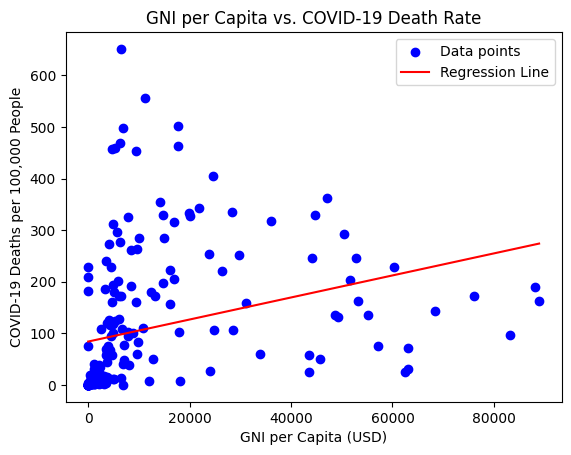

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data points')

x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Regression Line')

plt.xlabel('GNI per Capita (USD)')
plt.ylabel('COVID-19 Deaths per 100,000 People')
plt.title('GNI per Capita vs. COVID-19 Death Rate')
plt.legend()
plt.show()


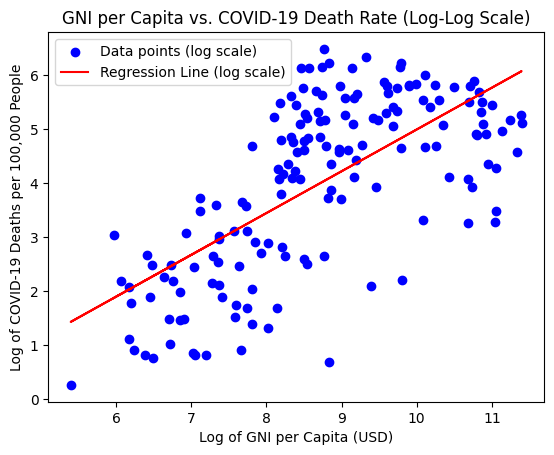

In [39]:



merged_data_cleaned = merged_data.dropna(subset=['GNI per Capita', 'Deaths per 100,000 People'])

# Replace zeros with a small value (such as 1) before log transformation to avoid -inf values.
X = merged_data_cleaned['GNI per Capita'].replace(0, 1)
y = merged_data_cleaned['Deaths per 100,000 People'].replace(0, 1)

# Adding 1 to all values to ensure there are no log(0) calculations.
X_log = np.log(X + 1)
y_log = np.log(y + 1)

# Check for inf values and handle them if they exist
X_log.replace([np.inf, -np.inf], np.nan, inplace=True)
y_log.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop any rows that still contain NaN or inf values after the transformation
X_log.dropna(inplace=True)
y_log.dropna(inplace=True)

# Reshape for sklearn
X_log_reshaped = X_log.values.reshape(-1, 1)
y_log_reshaped = y_log.values.reshape(-1, 1)

model_log = LinearRegression()

model_log.fit(X_log_reshaped, y_log_reshaped)

y_log_pred = model_log.predict(X_log_reshaped)

plt.scatter(X_log_reshaped, y_log_reshaped, color='blue', label='Data points (log scale)')
plt.plot(X_log_reshaped, y_log_pred, color='red', label='Regression Line (log scale)')
plt.xlabel('Log of GNI per Capita (USD)')
plt.ylabel('Log of COVID-19 Deaths per 100,000 People')
plt.title('GNI per Capita vs. COVID-19 Death Rate (Log-Log Scale)')
plt.legend()
plt.show()
